In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import applications
from tensorflow.keras.layers import BatchNormalization,Conv2D, AveragePooling2D,TimeDistributed,Dense, Dropout, Activation, Flatten,GlobalAveragePooling2D,MaxPool2D
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('val_accuracy')>0.99):

      print("\nReached 98% accuracy so cancelling training!")

      self.model.stop_training = True

In [3]:
train_path='/content/drive/My Drive/Dataset/TRAIN/'
train_datagen=ImageDataGenerator(rescale=1./255,preprocessing_function=preprocess_input,validation_split = 0.25) #included in our dependencies

train_generator=train_datagen.flow_from_directory(train_path,
                                                 target_size=(500,500),
                                                 color_mode='grayscale',
                                                 batch_size=5,
                                                 class_mode='categorical',
                                                 subset = 'training',
                                                 shuffle=True)

validation_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size=(500,500),
                                                 color_mode='grayscale',
                                                 batch_size=5,
                                                 class_mode='categorical',
                                                 subset = 'validation',
                                                 shuffle=True)

step_size_train=train_generator.n//train_generator.batch_size
step_size_validation=validation_generator.n//validation_generator.batch_size
print(step_size_train)
print(step_size_validation)

Found 3375 images belonging to 3 classes.
Found 1125 images belonging to 3 classes.
675
225


In [4]:
img_height,img_width=500,500
base_model = applications.densenet.DenseNet121(weights= None, include_top=False, input_shape= (img_height,img_width,1))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation= 'sigmoid')(x)
model = Model(inputs = base_model.input, outputs = predictions)
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 500, 1) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 506, 506, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 250, 250, 64) 3136        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 250, 250, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [19]:
callbacks = myCallback()
graph=model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                   steps_per_epoch=step_size_train,
                    validation_steps=step_size_validation,
                   epochs=4,callbacks=[callbacks])

Epoch 1/4
675/675 [==============================] - 393s 582ms/step - loss: 0.2418 - accuracy: 0.8720 - val_loss: 0.3309 - val_accuracy: 0.8302
Epoch 2/4
675/675 [==============================] - 393s 583ms/step - loss: 0.2071 - accuracy: 0.8889 - val_loss: 0.7962 - val_accuracy: 0.6471
Epoch 3/4
675/675 [==============================] - 393s 583ms/step - loss: 0.1973 - accuracy: 0.8996 - val_loss: 0.1493 - val_accuracy: 0.9236
Epoch 4/4
675/675 [==============================] - 393s 582ms/step - loss: 0.1905 - accuracy: 0.9073 - val_loss: 0.2402 - val_accuracy: 0.8800


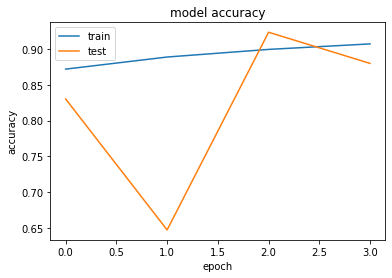

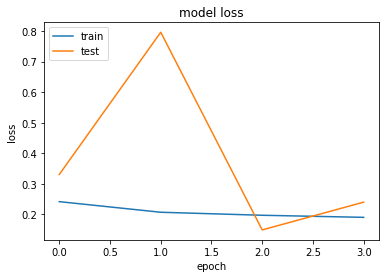

In [20]:
model.save("/content/drive/My Drive/Model/01covid19.h5")
import matplotlib.pyplot as plt
plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
def prepare(ima):
    IMG_SIZE = 500  # 50 in txt-based
    img_array = cv2.cvtColor(ima,cv2.COLOR_BGR2GRAY)
    img_array=img_array/255.0  # filepathread in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1,IMG_SIZE, IMG_SIZE,1)

In [42]:
import cv2
img=cv2.imread("/content/drive/My Drive/Dataset/TRAIN/PNEUMONIA/830.jpeg")
a=model.predict(prepare(img))    
print((a))

[[1. 1. 0.]]
